<h1> L'operatore findiff <h1>

https://findiff.readthedocs.io/en/latest/source/getstarted.html#first-derivatives

In [3]:
pip install --upgrade findiff

#in Spyder usa invece
#conda install -c conda-forge findiff

Note: you may need to restart the kernel to use updated packages.


In [4]:
from findiff import FinDiff

In [20]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
dx = x[1] - x[0]
f = np.sin(x)

FinDiff objects behave like operators, so in order to apply them, you can simply call them on a numpy ndarray of any shape:

In [21]:
d_dx = FinDiff(0, dx)
df_dx = d_dx(f)

Now df_dx is a new numpy array with the same shape as f containing the first derivative with respect to the zeroth axis:

In [9]:
import matplotlib.pyplot as plt

In [22]:
print(df_dx)

[ 1.00134077  0.99731683  0.99128901  0.98126963  0.96729902  0.94943343
  0.92774481  0.9023205   0.87326285  0.84068889  0.80472976  0.76553028
  0.72324827  0.678054    0.63012944  0.57966758  0.52687159  0.47195409
  0.41513619  0.35664668  0.29672108  0.23560069  0.17353163  0.11076381
  0.04754998 -0.01585531 -0.07919676 -0.14221932 -0.2046692  -0.26629496
 -0.32684844 -0.38608581 -0.44376856 -0.4996644  -0.55354827 -0.6052032
 -0.65442119 -0.70100406 -0.74476423 -0.7855255  -0.82312373 -0.85740754
 -0.88823886 -0.91549357 -0.9390619  -0.95884896 -0.97477508 -0.98677612
 -0.99480376 -0.99882568 -0.99882568 -0.99480376 -0.98677612 -0.97477508
 -0.95884896 -0.9390619  -0.91549357 -0.88823886 -0.85740754 -0.82312373
 -0.7855255  -0.74476423 -0.70100406 -0.65442119 -0.6052032  -0.55354827
 -0.4996644  -0.44376856 -0.38608581 -0.32684844 -0.26629496 -0.2046692
 -0.14221932 -0.07919676 -0.01585531  0.04754998  0.11076381  0.17353163
  0.23560069  0.29672108  0.35664668  0.41513619  0.4

(0.0, 6.283185307179586)

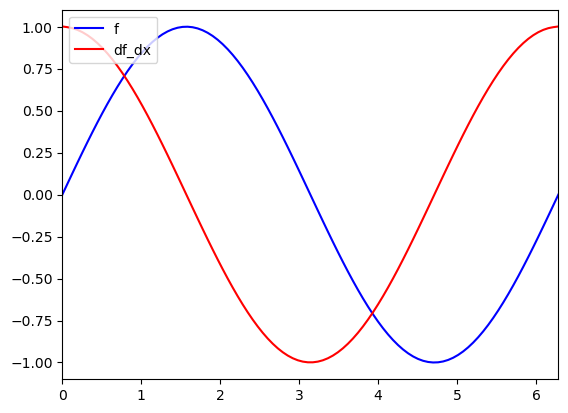

In [23]:
plt.plot(x,f, "-b", label="f")
plt.plot(x,df_dx, "-r", label="df_dx")
plt.legend(loc="upper left")
plt.xlim(0, 2*np.pi)

In [24]:
d2_dx2 = FinDiff(0, dx,2)
df2_dx2=d2_dx2(f)

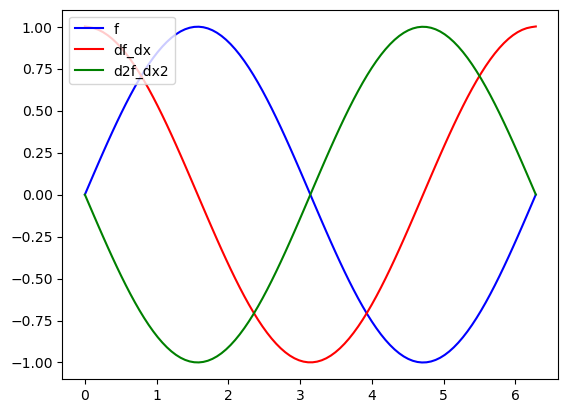

In [25]:
plt.plot(x,f, "-b", label="f")
plt.plot(x,df_dx, "-r", label="df_dx")
plt.plot(x,df2_dx2, "-g", label="d2f_dx2")
plt.legend(loc="upper left")

<h1>The Schrödinger equation<h1>

Consider for instance the stationary Schrödinger equation in 3D:
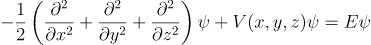

This is an eigenvalue problem for the differential operator:
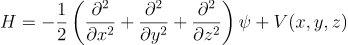

The Laplacian can be expressed as a FinDiff object, e.g. as

In [39]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
z = np.linspace(0, 100, 100)
dx=np.diff(x)[0]
dx=x[1]-x[0]
dy=np.diff(y)[0]
dz=np.diff(z)[0]
laplace = FinDiff(0, dx, 2) + FinDiff(1, dy, 2) + FinDiff(2, dz, 2)

<h1>Matrix Representation <h1>



For a given FinDiff differential operator, you can get the matrix representation using the matrix(shape) method, e.g.

In [49]:
mat = laplace.matrix((100, 100, 100))  # this method returns a scipy sparse matrix
print(mat)

  (0, 0)	5.880599999999999
  (0, 1)	-4.9005
  (0, 2)	3.9204000000000003
  (0, 3)	-0.9801000000000001
  (0, 100)	-4.9005
  (0, 200)	3.9204000000000003
  (0, 300)	-0.9801000000000001
  (0, 10000)	-4.9005
  (0, 20000)	3.9204000000000003
  (0, 30000)	-0.9801000000000001
  (1, 0)	0.9800999999999999
  (1, 1)	1.9601999999999997
  (1, 2)	0.9800999999999999
  (1, 101)	-4.9005
  (1, 201)	3.9204000000000003
  (1, 301)	-0.9801000000000001
  (1, 10001)	-4.9005
  (1, 20001)	3.9204000000000003
  (1, 30001)	-0.9801000000000001
  (2, 1)	0.9800999999999999
  (2, 2)	1.9601999999999997
  (2, 3)	0.9800999999999999
  (2, 102)	-4.9005
  (2, 202)	3.9204000000000003
  (2, 302)	-0.9801000000000001
  :	:
  (999997, 999697)	-0.9800999999999999
  (999997, 999797)	3.9203999999999994
  (999997, 999897)	-4.9005
  (999997, 999996)	0.9800999999999999
  (999997, 999997)	1.9602000000000015
  (999997, 999998)	0.9800999999999999
  (999998, 969998)	-0.9800999999999999
  (999998, 979998)	3.9203999999999994
  (999998, 989998)

<h1> Un esempio monodimensionale: l'oscillatore armonico <h1>


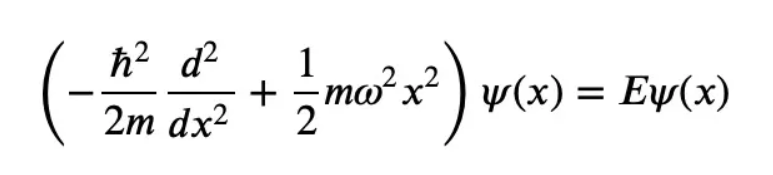

How can we solve that? One usual approach is to discretize the wave functions on a numerical grid. This turns the wave function into an array and the differential operators into matrices. Having done that, one could solve the eigenvalue problem using the standard numerical linear algebra methods. 

Since we are in 1 dimension here, we define a grid:
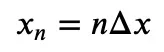

 Then we write

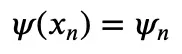

In [130]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff

In [131]:
N=1e3
x = np.linspace(-8, 8, int(N)) # define our grid
dx=x[1]-x[0]

Definisco prima il Laplaciano

In [132]:
#laplaciano
laplace = -0.5 * FinDiff(0, dx, 2)

In [133]:
lapl_M=laplace.matrix(x.shape)
#lapl_M è una sparse matrix, così mi mostra solo gli elementi non nulli
print(lapl_M)
#così la converto in una normale matrice
print(lapl_M.todense())

  (0, 3)	1949.2207031250882
  (0, 2)	-7796.882812500353
  (0, 1)	9746.10351562544
  (0, 0)	-3898.4414062501755
  (1, 2)	-1949.2207031250878
  (1, 1)	3898.4414062501755
  (1, 0)	-1949.2207031250878
  (2, 3)	-1949.2207031250878
  (2, 2)	3898.4414062501755
  (2, 1)	-1949.2207031250878
  (3, 4)	-1949.2207031250878
  (3, 3)	3898.4414062501755
  (3, 2)	-1949.2207031250878
  (4, 5)	-1949.2207031250878
  (4, 4)	3898.4414062501755
  (4, 3)	-1949.2207031250878
  (5, 6)	-1949.2207031250878
  (5, 5)	3898.4414062501755
  (5, 4)	-1949.2207031250878
  (6, 7)	-1949.2207031250878
  (6, 6)	3898.4414062501755
  (6, 5)	-1949.2207031250878
  (7, 8)	-1949.2207031250878
  (7, 7)	3898.4414062501755
  (7, 6)	-1949.2207031250878
  :	:
  (992, 993)	-1949.2207031250878
  (992, 992)	3898.4414062501755
  (992, 991)	-1949.2207031250878
  (993, 994)	-1949.2207031250878
  (993, 993)	3898.4414062501755
  (993, 992)	-1949.2207031250878
  (994, 995)	-1949.2207031250878
  (994, 994)	3898.4414062501755
  (994, 993)	-1949.2

e poi l'operatore potenziale V. To use the method we need to make everything discrete so the potential V(x)
 becomes a N×N
 matrix diag[V(x0),⋯,V(xN)]
.

In [128]:


#def Vpot(x):
  # return 0.5*x**2
Vpot=0.5*x**2
V=diags(Vpot)

print(V)
print(V.todense())

  (0, 0)	32.0
  (1, 1)	31.87200012825639
  (2, 2)	31.744256769281794
  (3, 3)	31.61676992307623
  (4, 4)	31.489539589639687
  (5, 5)	31.362565768972175
  (6, 6)	31.23584846107369
  (7, 7)	31.109387665944222
  (8, 8)	30.983183383583786
  (9, 9)	30.85723561399237
  (10, 10)	30.731544357169984
  (11, 11)	30.606109613116622
  (12, 12)	30.48093138183228
  (13, 13)	30.35600966331697
  (14, 14)	30.231344457570682
  (15, 15)	30.106935764593423
  (16, 16)	29.98278358438519
  (17, 17)	29.858887916945974
  (18, 18)	29.73524876227579
  (19, 19)	29.61186612037463
  (20, 20)	29.488739991242493
  (21, 21)	29.36587037487939
  (22, 22)	29.243257271285298
  (23, 23)	29.12090068046024
  (24, 24)	28.998800602404206
  :	:
  (975, 975)	28.998800602404206
  (976, 976)	29.120900680460235
  (977, 977)	29.24325727128529
  (978, 978)	29.36587037487939
  (979, 979)	29.488739991242493
  (980, 980)	29.61186612037463
  (981, 981)	29.735248762275784
  (982, 982)	29.858887916945967
  (983, 983)	29.98278358438519
  (98

In [134]:
H=lapl_M+V

In [135]:
print(H.todense())

[[-3866.44140625  9746.10351563 -7796.8828125  ...     0.
      0.             0.        ]
 [-1949.22070313  3930.31340638 -1949.22070313 ...     0.
      0.             0.        ]
 [    0.         -1949.22070313  3930.18566302 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...  3930.18566302
  -1949.22070313     0.        ]
 [    0.             0.             0.         ... -1949.22070313
   3930.31340638 -1949.22070313]
 [    0.             0.             0.         ... -7796.8828125
   9746.10351563 -3866.44140625]]


calculate the eigenvectors and eigenvalues of a sparse matrix (eigs is from scipy.sparse.linalg). But not all of them, but just the first 10 because I don’t need more for plotting. That's what the argument k means. But which ten? Those with the smallest real part of the eigenvalues first! This is what which='SR’ means. So this gives us the lower part of the spectrum.

In [136]:
energies, states = eigs(H,k=10, which='SR')

As a proof that this really worked, let’s plot the first few wave functions and the lower part of the energy spectrum:

(-6.0, 6.0)

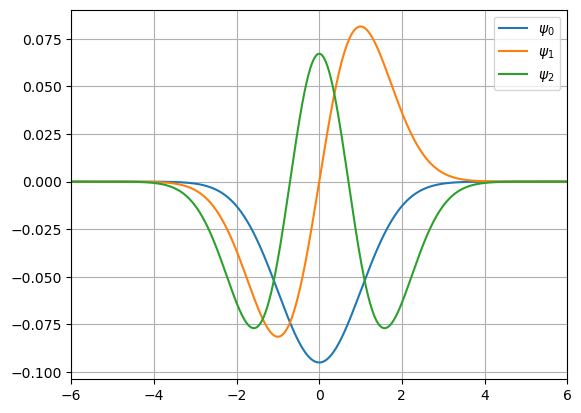

In [137]:
import matplotlib.pyplot as plt
plt.plot(x, states[:, 0].real, label='$\psi_0$')
plt.plot(x, states[:, 1].real, label='$\psi_1$')
plt.plot(x, states[:, 2].real, label='$\psi_2$')
plt.grid()
plt.legend()
plt.xlim(-6, 6)

The ground state is a Gaussian, and the excited states are Gaussians multiplied by a Hermite polynomial. With each level, the number of nodes of the wave function increases by one. So the ground state has no node, the first excited state has one node, etc.

The energy spectrum looks like that:

In [74]:
print(energies[:5])

[0.49979992+0.j 1.49899928+0.j 2.49739719+0.j 3.49499269+0.j
 4.49178481+0.j]


[[0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49999198]
 [0.49

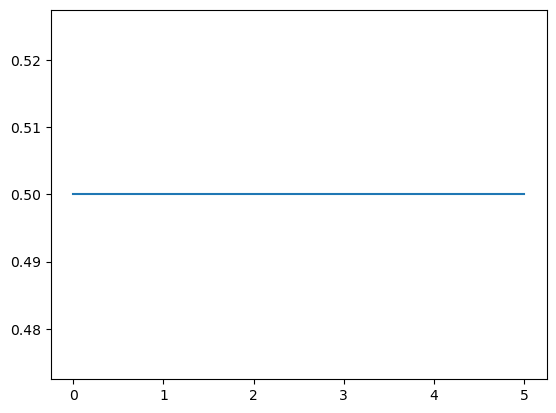

In [138]:
#Plotto lo stato fondamentale
x=np.linspace(0,5,100)
E=np.full((len(x),1),energies[0].real)

print(E)
plt.plot(x, E)

Text(0, 0.5, 'energy [a.u.]')

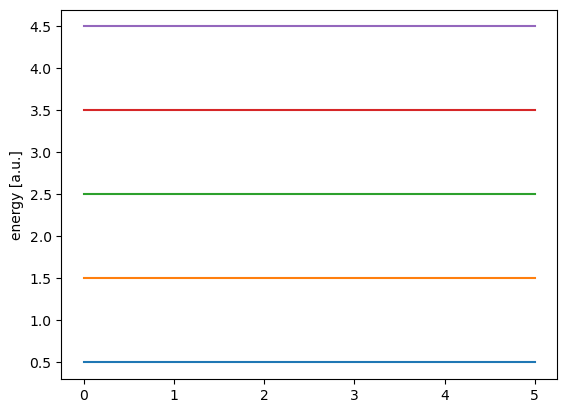

In [84]:
x=np.linspace(0,5,100)
for E in energies[:5]:
    E=np.full((len(x),1),E.real)
    plt.plot(x, E)
plt.ylabel('energy [a.u.]')

Text(0, 0.5, 'energy [a.u.]')

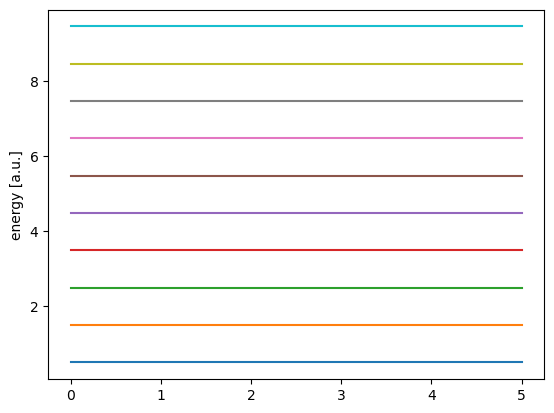

In [85]:
x=np.linspace(0,5,100)
for E in energies[:]:
    E=np.full((len(x),1),E.real)
    plt.plot(x, E)
plt.ylabel('energy [a.u.]')